# Importing the libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data

In [23]:
df = pd.read_json('MyActivity.json')

In [24]:
df.columns

Index(['header', 'title', 'titleUrl', 'subtitles', 'time', 'products',
       'activityControls', 'description', 'details'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112956 entries, 0 to 112955
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   header            112956 non-null  object
 1   title             112956 non-null  object
 2   titleUrl          112643 non-null  object
 3   subtitles         94900 non-null   object
 4   time              112956 non-null  object
 5   products          112956 non-null  object
 6   activityControls  91307 non-null   object
 7   description       3937 non-null    object
 8   details           5990 non-null    object
dtypes: object(9)
memory usage: 7.8+ MB


In [27]:
df.sample(3)

,header,title,titleUrl,subtitles,time,products,activityControls,description,details
57134,YouTube,Watched https://www.youtube.com/watch?v=1afbJB...,https://www.youtube.com/watch?v=1afbJBoJ5ZA,NaN,2023-02-03T18:23:29.381Z,[YouTube],[YouTube watch history],NaN,NaN
112660,YouTube,Searched for rahasya movie trailer,https://www.youtube.com/results?search_query=r...,NaN,2015-01-30T19:10:24.285Z,[YouTube],[YouTube search history],NaN,NaN
112895,YouTube,Searched for khanacademy physics fluid,https://www.youtube.com/results?search_query=k...,NaN,2012-05-12T09:24:50.578Z,[YouTube],[YouTube search history],NaN,NaN


In [28]:
analysis = df.copy()

# Data Cleaning section

**Making a dataset with only 'Watched' videos for further analysis**

In [29]:
analysis = analysis.loc[analysis['title'].str.startswith('Watched')]

In [30]:
analysis.shape

(78801, 9)

In [31]:
analysis.sample()

,header,title,titleUrl,subtitles,time,products,activityControls,description,details
52522,YouTube,Watched rohit khatri roast ft. Mr Bioengineer ...,https://www.youtube.com/watch?v=0ZyCdmm4DQs,"[{'name': 'Mr Bioengineer', 'url': 'https://ww...",2023-02-19T16:57:55.284Z,[YouTube],[YouTube watch history],NaN,NaN


**Changing the datatype of 'time' column to datetime**

In [32]:
analysis['time'] = analysis['time'].apply(pd.to_datetime)


In [33]:
analysis['time'] = analysis['time'].dt.tz_convert('Asia/Kolkata')

In [34]:
analysis['title'].value_counts()

Watched a video that has been removed                                                                   305
Watched 10 Min Guided Meditation Session for Beginners (Follow Along)                                   299
Watched Enjoy 90 Million Songs and Over 15 Million Podcast Episodes | Included with Prime               210
Watched Order now on Swiggy & Get 50% Off + Free delivery on your first order.                           75
Watched Play Rummy Win Cash| Play on RummyCircle.com                                                     60
                                                                                                       ... 
Watched This New Tax will kill your travel plans #LLAShorts 598                                           1
Watched Ghar Banduk Biryani | घर बंदूक बिरयानी | Official Trailer | Akash Thosar | Watch Now on ZEE5      1
Watched Life after IPL got over 🥹🏏 #shorts #ytshorts #ipl #ipl2023 #iplfinal                              1
Watched PM Modi's adorable c

**Filtering the noise from the data**

In [35]:
analysis = analysis[analysis['title'] != 'Watched a video that has been removed']

In [36]:
analysis['title'].value_counts()

Watched 10 Min Guided Meditation Session for Beginners (Follow Along)                                   299
Watched Enjoy 90 Million Songs and Over 15 Million Podcast Episodes | Included with Prime               210
Watched Order now on Swiggy & Get 50% Off + Free delivery on your first order.                           75
Watched Play Rummy Win Cash| Play on RummyCircle.com                                                     60
Watched Cricket 6s Upto 60 V2 16 9                                                                       53
                                                                                                       ... 
Watched This New Tax will kill your travel plans #LLAShorts 598                                           1
Watched Ghar Banduk Biryani | घर बंदूक बिरयानी | Official Trailer | Akash Thosar | Watch Now on ZEE5      1
Watched Life after IPL got over 🥹🏏 #shorts #ytshorts #ipl #ipl2023 #iplfinal                              1
Watched PM Modi's adorable c

In [37]:
analysis[analysis['title'] == 'Watched Enjoy 90 Million Songs and Over 15 Million Podcast Episodes | Included with Prime']

,header,title,titleUrl,subtitles,time,products,activityControls,description,details
486,YouTube,Watched Enjoy 90 Million Songs and Over 15 Mil...,https://www.youtube.com/watch?v=ir-9fR21tyA,NaN,2023-09-11 13:10:53.432000+05:30,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 1:10 PM,[{'name': 'From Google Ads'}]
548,YouTube,Watched Enjoy 90 Million Songs and Over 15 Mil...,https://www.youtube.com/watch?v=Fxj1yh7pvh0,NaN,2023-09-10 06:20:18.464000+05:30,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 6:20 AM,[{'name': 'From Google Ads'}]
3848,YouTube,Watched Enjoy 90 Million Songs and Over 15 Mil...,https://www.youtube.com/watch?v=DpcVW0vBbHQ,NaN,2023-09-02 07:23:44.146000+05:30,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 7:23 AM,[{'name': 'From Google Ads'}]
4414,YouTube,Watched Enjoy 90 Million Songs and Over 15 Mil...,https://www.youtube.com/watch?v=DpcVW0vBbHQ,NaN,2023-08-30 07:14:02.822000+05:30,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 7:14 AM,[{'name': 'From Google Ads'}]
7062,YouTube,Watched Enjoy 90 Million Songs and Over 15 Mil...,https://www.youtube.com/watch?v=DpcVW0vBbHQ,NaN,2023-08-20 20:37:27.697000+05:30,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 8:37 PM,[{'name': 'From Google Ads'}]
...,...,...,...,...,...,...,...,...,...
90798,YouTube,Watched Enjoy 90 Million Songs and Over 15 Mil...,https://www.youtube.com/watch?v=DpcVW0vBbHQ,NaN,2022-05-21 06:40:14.360000+05:30,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 6:40 AM,[{'name': 'From Google Ads'}]
90961,YouTube,Watched Enjoy 90 Million Songs and Over 15 Mil...,https://www.youtube.com/watch?v=DpcVW0vBbHQ,NaN,2022-05-13 06:47:24.502000+05:30,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 6:47 AM,[{'name': 'From Google Ads'}]
91011,YouTube,Watched Enjoy 90 Million Songs and Over 15 Mil...,https://www.youtube.com/watch?v=ir-9fR21tyA,NaN,2022-05-11 06:50:24.447000+05:30,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 6:50 AM,[{'name': 'From Google Ads'}]
91123,YouTube,Watched Enjoy 90 Million Songs and Over 15 Mil...,https://www.youtube.com/watch?v=ir-9fR21tyA,NaN,2022-05-05 06:58:10.018000+05:30,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 6:58 AM,[{'name': 'From Google Ads'}]


In [38]:
analysis['details']


0                                  NaN
1                                  NaN
2        [{'name': 'From Google Ads'}]
3                                  NaN
8                                  NaN
                     ...              
99352    [{'name': 'From Google Ads'}]
99663    [{'name': 'From Google Ads'}]
99716    [{'name': 'From Google Ads'}]
99774    [{'name': 'From Google Ads'}]
99792    [{'name': 'From Google Ads'}]
Name: details, Length: 78496, dtype: object

In [39]:
analysis['details'] = analysis['details'].apply(pd.Series)  #convert 'details' column from a list ([]) to a dictionary ({})

In [40]:
analysis = analysis[analysis['details'] != {'name': 'From Google Ads'}]

# Exploratory Data Analysis (EDA)

In [41]:
head = analysis['title'].value_counts()[:5]

**Barplot of the most watched Videos**

<Axes: >

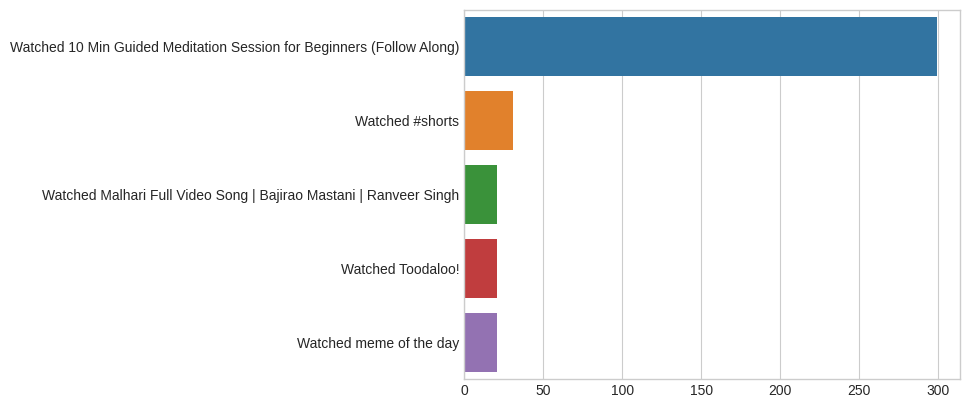

In [42]:
sns.barplot(x=head.values, y=head.index, orient='h')

In [43]:
analysis['subtitles'].isnull().sum()

3549

In [44]:
analysis['subtitles'] = analysis['subtitles'].apply(pd.Series)

In [45]:
analysis.dropna(subset=['subtitles'], inplace=True)

In [46]:
analysis.shape

(68992, 9)

In [52]:
analysis['subtitles'][3]['name']

'Fit Tuber'

**Extracting Channel name from the 'subtitles' column**

In [53]:
my_list = []

In [55]:
for name in analysis['subtitles']:
  my_list.append(name['name'])

In [56]:
my_list

['EdSarrthi IAS by Varun Jain!',
 'The Critical Drinker',
 'Fit Tuber',
 'The Kurta Guy',
 'Action Media Video',
 'Kranthi Ammagari',
 'Dr Karan',
 'T-Series',
 'Vanga Tamizha',
 'Filmy Biryani ',
 'Monalisha Mahapatra',
 'Andy Cooks',
 'Magic Boy Kabir',
 'LoeWhaley',
 'Filmy Biryani ',
 'Unfiltered Stories',
 'Christy R. Harrill ',
 'Shadé Zahrai',
 'Angry Rantman',
 'TheCottageFairy',
 'Dr Pal',
 'Shubham Kumar',
 'Will Tennyson',
 'Danny Pandit',
 'Fit Tuber',
 'Master-xJD',
 'YT Object',
 'Filmy Biryani ',
 'Great Indian Asmr',
 'Krish Mahadik',
 'Artsy Pads',
 'おるたなChannel',
 'C̶R̶7̶ RΩΠΔLDΩ ΩҒҒICIΔL ΨT',
 'VP Motion',
 'Filmy Biryani ',
 'Tonggeshuoche',
 'SM Views',
 'YT Object',
 'Drew Dirksen',
 'MAYNIKH',
 'ANTFACTORY Woodworking',
 'Filmy Biryani ',
 'Anthony Rahayel',
 'LMA Couple Vlog',
 'Priyal Kukreja',
 'Jodi Anoorabh',
 'FactsPlug',
 'top10globalview',
 'Empty Brain',
 'Filmy Biryani ',
 'Bhukkadnumber1',
 'Benjamin Hammond @ The Mill',
 'Curious Rohit',
 'Hardly Init

**Adding a new column to the dataframe named 'Channel Name'**

In [57]:
analysis['Channel Name'] = my_list

In [58]:
analysis.sample(3)

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,Channel Name
42224,YouTube,Watched भारतीय इतिहास के सबसे घातक हथियार |Wea...,https://www.youtube.com/watch?v=aiXuRW6VLtQ,"{'name': 'Facttube Facts', 'url': 'https://www...",2023-03-27 12:21:26.138000+05:30,[YouTube],[YouTube watch history],NaN,NaN,Facttube Facts
57295,YouTube,Watched Landline-Full vid ‘Forty Plus’ on YouT...,https://www.youtube.com/watch?v=BerB2TKTdU0,"{'name': 'Sachit Bhatia', 'url': 'https://www....",2023-02-03 23:11:00.536000+05:30,[YouTube],[YouTube watch history],NaN,NaN,Sachit Bhatia
85459,YouTube,Watched 🔥🔥Google employees 🔥🔥#shorts,https://www.youtube.com/watch?v=WDUCqaFeu18,"{'name': 'Factism97', 'url': 'https://www.yout...",2022-09-09 12:02:04.610000+05:30,[YouTube],[YouTube watch history],NaN,NaN,Factism97


In [61]:
channel = analysis['Channel Name'].value_counts()[0:5]

<Axes: >

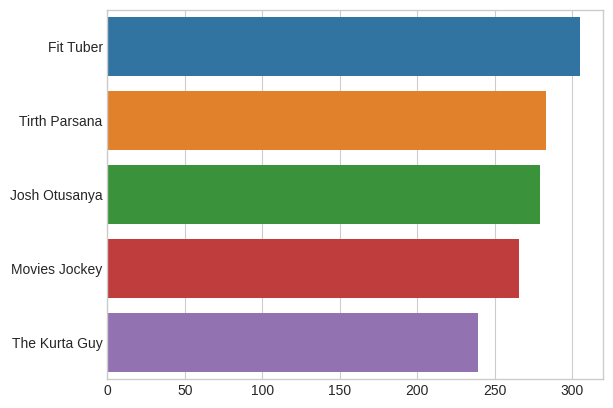

In [62]:
sns.barplot(x=channel.values, y=channel.index, orient='h')

# Analyzing the watch history through datetime

In [63]:
watched_morning= analysis.loc[(analysis['time'].dt.hour >= 6) & (analysis['time'].dt.hour <= 11)]
titles_totals_morning = watched_morning.groupby('title').size().reset_index(name='Play counts')
top_morning = titles_totals_morning.sort_values('Play counts', ascending=False).set_index('title')[0:5]
top_morning

,Play counts
title,
Watched 10 Min Guided Meditation Session for Beginners (Follow Along),298
Watched #shorts,10
Watched Toodaloo!,8
Watched Arabic Kuthu - Video Song | Beast | Thalapathy Vijay | Pooja Hegde | Sun Pictures | Nelson | Anirudh,7
Watched Full Video: Ranjithame - Varisu (Tamil) | Thalapathy Vijay | Rashmika | Vamshi Paidipally | Thaman S,7


**Plot of videos watched in the morning session**

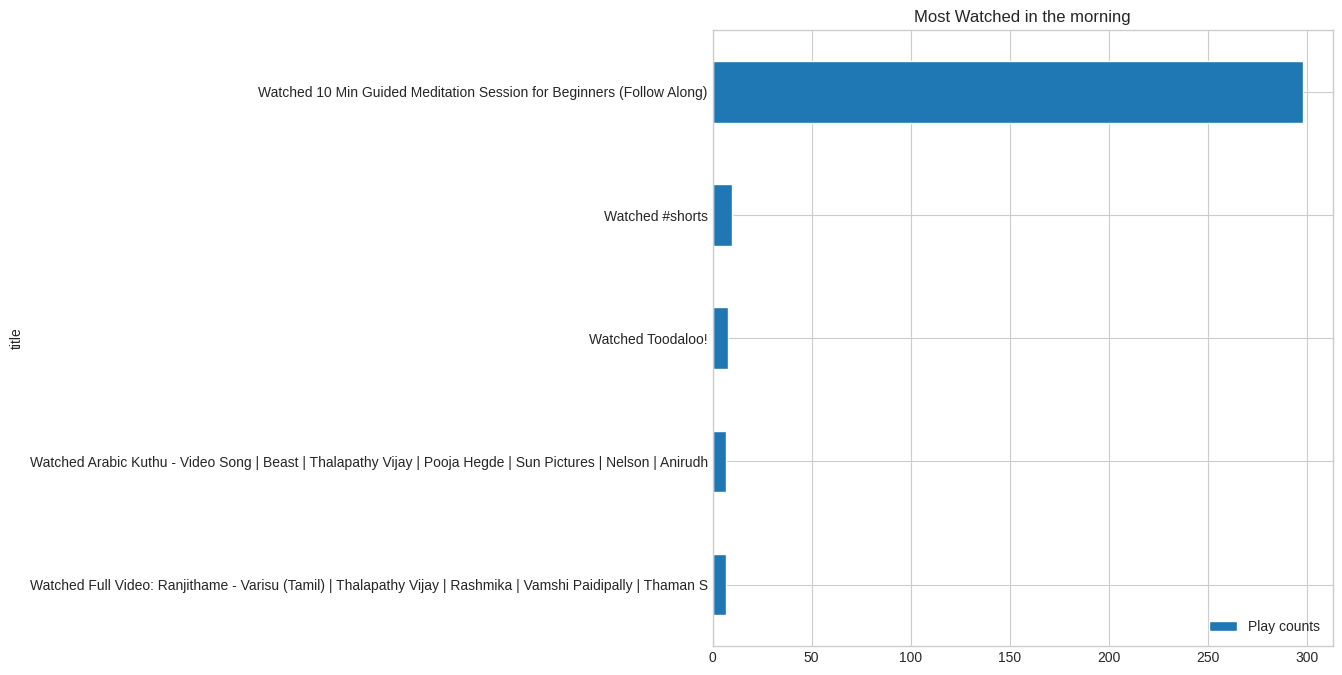

In [64]:
colormap = [plt.cm.Blues(np.linspace(0.2,1.0,len(top_morning)))]
plt.rcParams['figure.figsize'] = [8, 8]
top_morning[::-1].plot(kind='barh', edgecolor='w')
plt.title('Most Watched in the morning')
plt.show()

In [65]:
watched_evening = analysis.loc[(analysis['time'].dt.hour > 19) | (analysis['time'].dt.hour < 3)]
watched_totals_evening = watched_evening.groupby('title').size().reset_index(name='Play counts')
top_evening = watched_totals_evening.sort_values('Play counts', ascending=False).set_index('title')[0:5]
top_evening

,Play counts
title,
Watched #shorts,18
Watched meme of the day,14
Watched Toodaloo!,8
Watched would you eat this? #shorts,7
Watched | Sthal Pune | Atharva sudame |,7


**Plot of videos watched in the evening session**

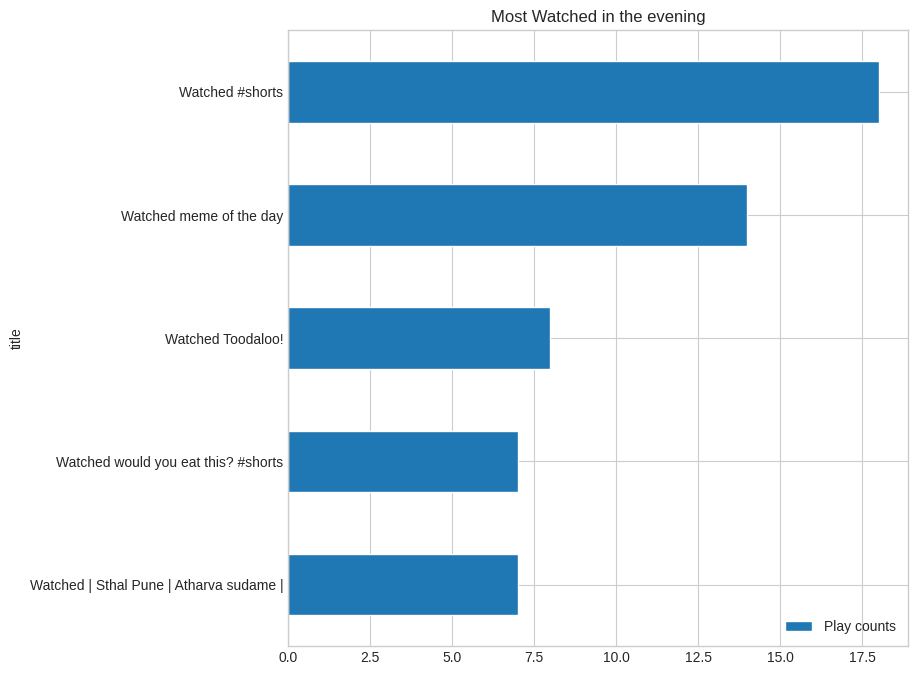

In [68]:
colormap = [plt.cm.Blues(np.linspace(0.2,1.0,len(top_evening)))]
plt.rcParams['figure.figsize'] = [8, 8]
top_evening[::-1].plot(kind='barh', edgecolor='w')
plt.title('Most Watched in the evening')
plt.show()

**Monthly histogram gives the insights about the video watch frequency in all the months**

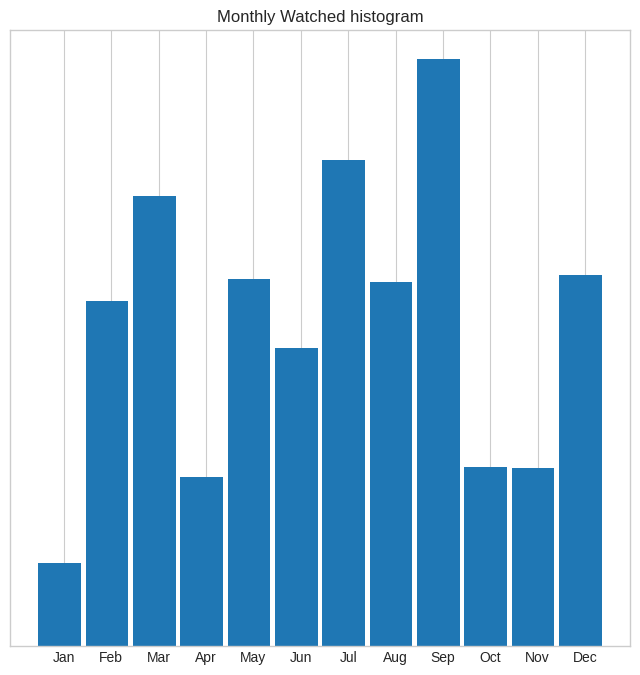

In [67]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.yticks([])
plt.xticks(np.arange(1+0.5/(11/12),12+0.5/(11/12),11/12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
analysis['time'].dt.month.hist(bins=12, rwidth=0.9)
plt.title('Monthly Watched histogram')
plt.show()

**Hourly histogram shows that most of the videos are watched in the evening**

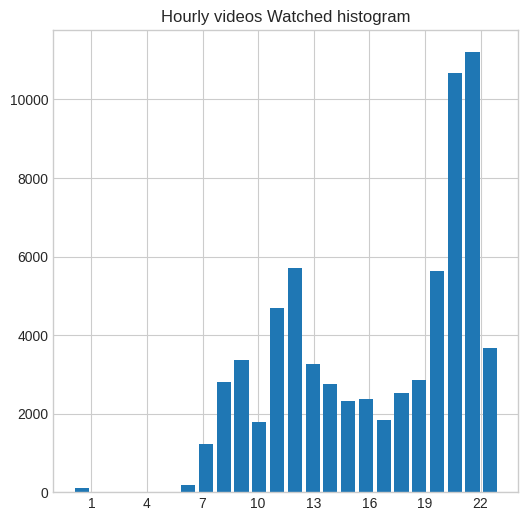

In [70]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.xticks(np.arange(1,23,3))
analysis['time'].dt.hour.hist(bins=24, rwidth=0.8)
plt.title('Hourly videos Watched histogram')
plt.show()

**Weekdays are the busiest in terms of YouTube watched activity**

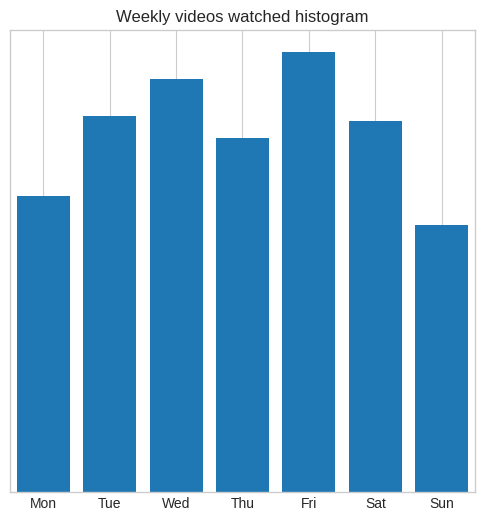

In [71]:
plt.rcParams['figure.figsize'] = [6, 6]
bin_w = 6.0 / 7.0
plt.xticks(np.arange(bin_w/2, bin_w/2 + 6, bin_w), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.xlim(0, 6)
plt.yticks([])
analysis['time'].dt.weekday.hist(bins=7, rwidth=0.8)
plt.title('Weekly videos watched histogram')
plt.show()

**Weekly YouTube watching distribution suggests that most of the videos are watched from 8 am to 12 am**

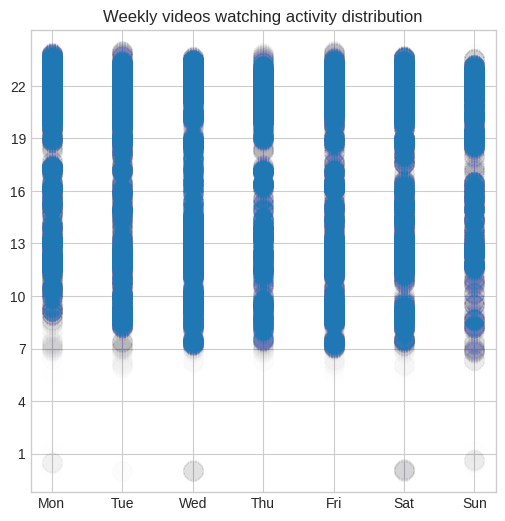

In [72]:
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.yticks(np.arange(1,23,3))
plt.scatter(analysis['time'].dt.weekday.to_numpy(), analysis['time'].dt.hour.to_numpy() + analysis['time'].dt.minute.to_numpy() / 60, alpha=0.002, s=200.0)
plt.title('Weekly videos watching activity distribution')
plt.show()